# Analysing my keylogger

In [2]:
fp = "/var/log/keystroke.log"
with open(fp) as f:
    data = f.readlines()

In [3]:
len(data)

6

In [17]:
s = ''.join(data)
tmp = ''
cont = False
outlist = []
for chr in s:
    if chr == '[':
        cont=True
    elif chr == ']':
        cont=False
    elif chr == ' ':
        tmp += 'space'
    elif chr in '\n':
        continue
    else:
        tmp+=chr.lower()
    if not cont:
        outlist.append(tmp)
        tmp = ''

In [18]:
from collections import defaultdict
histogram = defaultdict(int)
for key in outlist:
    histogram[key]+=1

In [19]:
histogram['space']

1931

In [20]:
lst = []
for k in histogram:
    lst.append((histogram[k],k))
lst.sort()

In [21]:
import json, cv2
from matplotlib import pyplot as plt
with open('k2.json','r') as f:
    box_data = json.load(f)

im = cv2.imread('k2.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

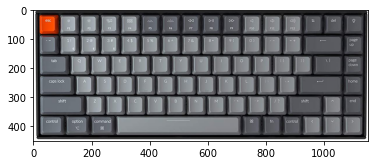

In [22]:
plt.imshow(im)

In [23]:
bmap = dict()
for shape in box_data['shapes']:
    bmap[shape['label']] = {'box':shape['points'], 'weight':0}

In [24]:
mxweight = -1
for k in histogram:
    for bk in bmap:
        if k in bk.split():
            bmap[bk]['weight'] += histogram[k]
            mxweight = max(mxweight, bmap[bk]['weight'])
            break

In [25]:
bmap

{'esc': {'box': [[31.831460674157306, 26.831460674157313],
   [74.52808988764045, 72.89887640449439]],
  'weight': 42},
 'f1': {'box': [[102.61797752808988, 25.707865168539342],
   [141.9438202247191, 71.77528089887642]],
  'weight': 1},
 'f2': {'box': [[167.78651685393257, 24.584269662921315],
   [213.85393258426967, 70.65168539325845]],
  'weight': 0},
 'f3': {'box': [[241.9438202247191, 26.831460674157313],
   [284.64044943820227, 71.77528089887642]],
  'weight': 0},
 'f4': {'box': [[311.60674157303373, 26.831460674157313],
   [350.9325842696629, 70.65168539325845]],
  'weight': 0},
 'f5': {'box': [[384.64044943820227, 27.955056179775283],
   [426.2134831460674, 69.52808988764042]],
  'weight': 0},
 'f6': {'box': [[454.30337078651684, 27.955056179775283],
   [493.62921348314603, 71.77528089887642]],
  'weight': 1},
 'f7': {'box': [[523.9662921348314, 29.078651685393254],
   [561.0449438202247, 68.40449438202245]],
  'weight': 0},
 'f8': {'box': [[595.876404494382, 23.460674157303345

In [26]:
bmap['space']

{'box': [[295.87640449438203, 371.7752808988764],
  [703.7415730337078, 418.9662921348314]],
 'weight': 1931}

In [27]:
im.shape

(450, 1153, 3)

In [28]:
import numpy as np
import colorsys

In [29]:
from matplotlib import colors
import seaborn as sns
from math import log2

cmap = sns.color_palette("rocket",as_cmap=True)

In [30]:
heatmap = np.zeros(im.shape, dtype='uint8')
lmx = log2(mxweight)
for k in bmap:
    v = bmap[k]
    l = int(v['box'][0][0])
    u = int(v['box'][0][1])
    r = int(v['box'][1][0])
    d = int(v['box'][1][1])
    # print(np.array(cmap(v['weight']/mxweight)[:3]))
    lw = log2(float(v['weight'])) if v['weight'] else 0
    heatmap[u:d, l:r] = np.array(cmap(lw/lmx)[:3])*255

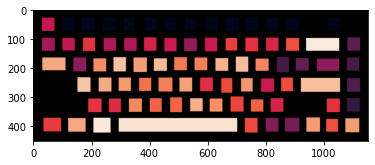

In [31]:
plt.imshow(heatmap)

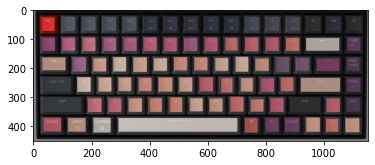

In [32]:
heatim = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
added = cv2.addWeighted(im,0.5,heatmap,0.5,0)
plt.imshow(added)

In [33]:
cv2.imwrite('output.jpg', cv2.cvtColor(added, cv2.COLOR_RGB2BGR))

True